In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\DLW.csv")
df

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df['Results'].mean()

0.6

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = df[['DMV_Test_1', 'DMV_Test_2']].values
results = df['Results'].values
results.shape

(100,)

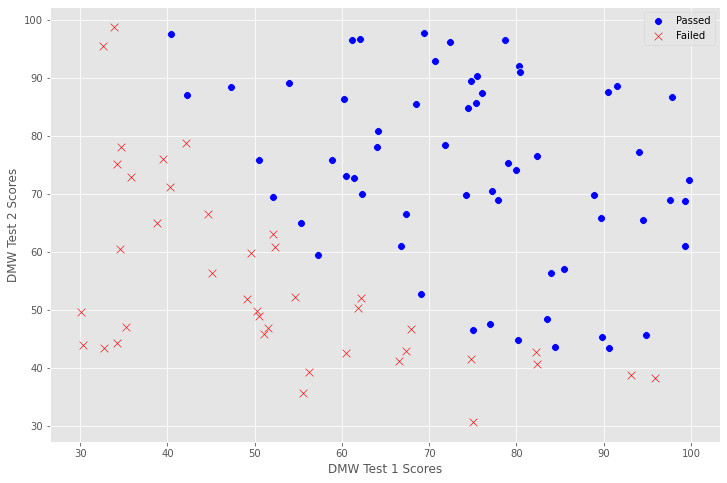

In [7]:
passed = (results == 1)
failed = (results == 0)

ax = sns.scatterplot(x=scores[passed[:], 0], y=scores[passed[:], 1], marker="o", color="blue", s=60)
ax = sns.scatterplot(x=scores[failed[:], 0], y=scores[failed[:], 1], marker="x", color="red", s=60)
ax.set(xlabel='DMW Test 1 Scores', ylabel='DMW Test 2 Scores')
ax.legend(["Passed", "Failed"])
plt.show()


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    pred = sigmoid(X.dot(theta))
    error = y * np.log(pred) + (1-y) * np.log(1-pred)
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(X.transpose(), (pred - y))
    return cost, gradient

scores = (scores - scores.mean()) / (scores.std())

m = df.Results.size
X = np.append(np.ones((m, 1)), scores, axis=1)
y = results.reshape(m, 1)
theta = np.zeros((3,1))

cost, gradient = cost_function(X, y, theta)
print("cost is ", cost)
print("gradients are", gradient)

cost is  [0.69314718]
gradients are [[-0.1       ]
 [-0.28606568]
 [-0.24664251]]


In [10]:
def gradient_descent(X, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = cost_function(X, y, theta)
        theta -= alpha * gradient
        costs.append(cost)
    return costs, theta
gradient_descent(X, y, theta, 1, 2000)

([array([0.69314718]),
  array([0.55899154]),
  array([0.48015689]),
  array([0.43009267]),
  array([0.39574832]),
  array([0.37071062]),
  array([0.35159621]),
  array([0.33647985]),
  array([0.3241917]),
  array([0.3139812]),
  array([0.30534471]),
  array([0.29793143]),
  array([0.29148926]),
  array([0.28583216]),
  array([0.28081969]),
  array([0.27634373]),
  array([0.27231957]),
  array([0.26867986]),
  array([0.26537032]),
  array([0.26234667]),
  array([0.2595724]),
  array([0.25701712]),
  array([0.25465531]),
  array([0.25246537]),
  array([0.25042886]),
  array([0.24852998]),
  array([0.24675506]),
  array([0.24509223]),
  array([0.24353113]),
  array([0.24206267]),
  array([0.24067882]),
  array([0.2393725]),
  array([0.23813738]),
  array([0.23696785]),
  array([0.23585886]),
  array([0.2348059]),
  array([0.23380488]),
  array([0.23285212]),
  array([0.23194429]),
  array([0.23107836]),
  array([0.23025156]),
  array([0.22946138]),
  array([0.2287055]),
  array([0.227981

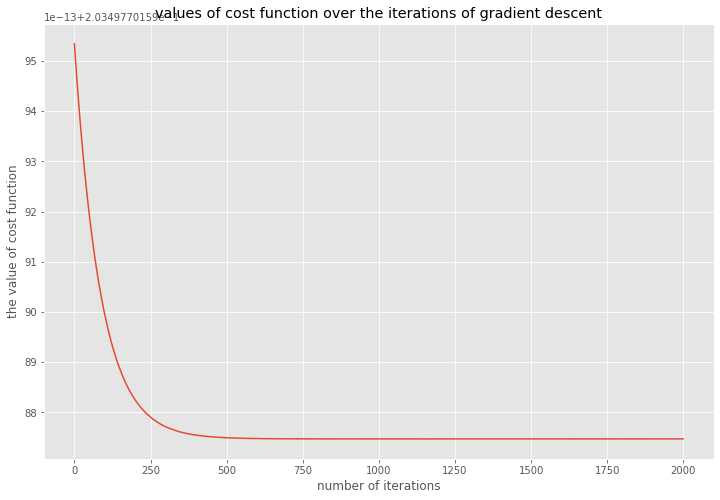

In [11]:
costs = gradient_descent(X, y, theta, 1, 2000)[0]
plt.plot(costs)
plt.xlabel("number of iterations")
plt.ylabel("the value of cost function")
plt.title("values of cost function over the iterations of gradient descent");

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMW Test 1 Scores', ylabel='DMW Test 2 Scores'>

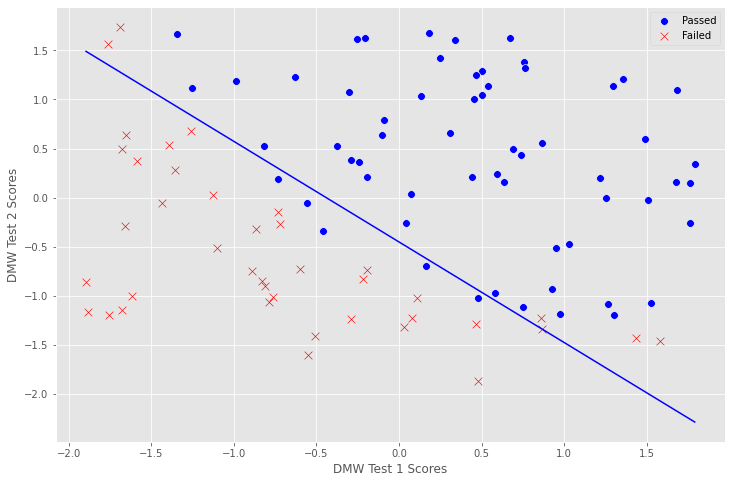

In [12]:
ax = sns.scatterplot(x=X[passed[:], 1], y=X[passed[:], 2], marker="o", color="blue", s=60)
ax = sns.scatterplot(x=X[failed[:], 1], y=X[failed[:], 2], marker="x", color="red", s=60)
ax.set(xlabel='DMW Test 1 Scores', ylabel='DMW Test 2 Scores')
ax.legend(["Passed", "Failed"])
np.max(X[:, 1])
X_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = (theta[0] + theta[1] * X_boundary) / (-theta[2])
sns.lineplot(X_boundary, y_boundary, color="blue")